In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from datetime import datetime
import time
import sqlite3
import connectorx as cx
from scipy.stats.mstats import winsorize

In [38]:
import datafunc; reload(datafunc)
import functions; reload(functions)
from datafunc import *
from functions import *

In [4]:
conn = sqlite3.connect('main.db')
c = conn.cursor()

In [5]:
df = cx.read_sql('sqlite://main.db', get_top_stocks())

In [6]:
df['date'] = df['time'].apply(date_from_timestamp)

In [8]:
df['return'] = df['close'].groupby(df['ticker']).pct_change()
df['cumret'] = df.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [9]:
df['crosses'] = df.groupby('ticker').close.transform(get_crossings)
df['crosses5'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=5))
df['crosses15'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=15))
df['crosses30'] = df.groupby('ticker').close.transform(lambda x: get_crossings(x, ma=30))

In [34]:
between = get_between(df)

In [11]:
splits = get_splits(from_date='2024-05-01', to_date='2024-07-08')
split_tickers = [x for x in splits.ticker.unique() if x in df.ticker.unique()]

In [12]:
nosplits = df[~df['ticker'].isin(split_tickers)].copy()

In [13]:
nosplits['std'] = nosplits.groupby('ticker')['return'].transform(lambda x: x.std())
nosplits['stddev'] = nosplits['std'].transform(normalize)

In [84]:
nosplits['std'] = nosplits.groupby('ticker')['return'].transform(lambda x: 
    winsorize(x, limits=[0.05, 0.05]).std())
nosplits['stddev'] = nosplits['std'].transform(normalize)

In [97]:
nosplits['crossnorm'] = nosplits['crosses15'].transform(normalize)
nosplits['score'] = nosplits['stddev'] + nosplits['crossnorm']

In [103]:
blacklist = ['TBIL', 'USFR', 'BIL', 'GBIL', 'SHV', 'BILS', 'TFLO', 'SGOV', 'XHLF', 'XGOV', 'XBIL',
    'FTSM']

In [106]:
a

ticker
BNDX    29.0
HLN     29.0
TD      29.0
ATEX    28.0
SPSK    28.0
ASG     27.0
CpN     27.0
ELS     27.0
FTDR    27.0
GNR     27.0
HAUZ    27.0
HPQ     27.0
Name: crosses15, dtype: float64

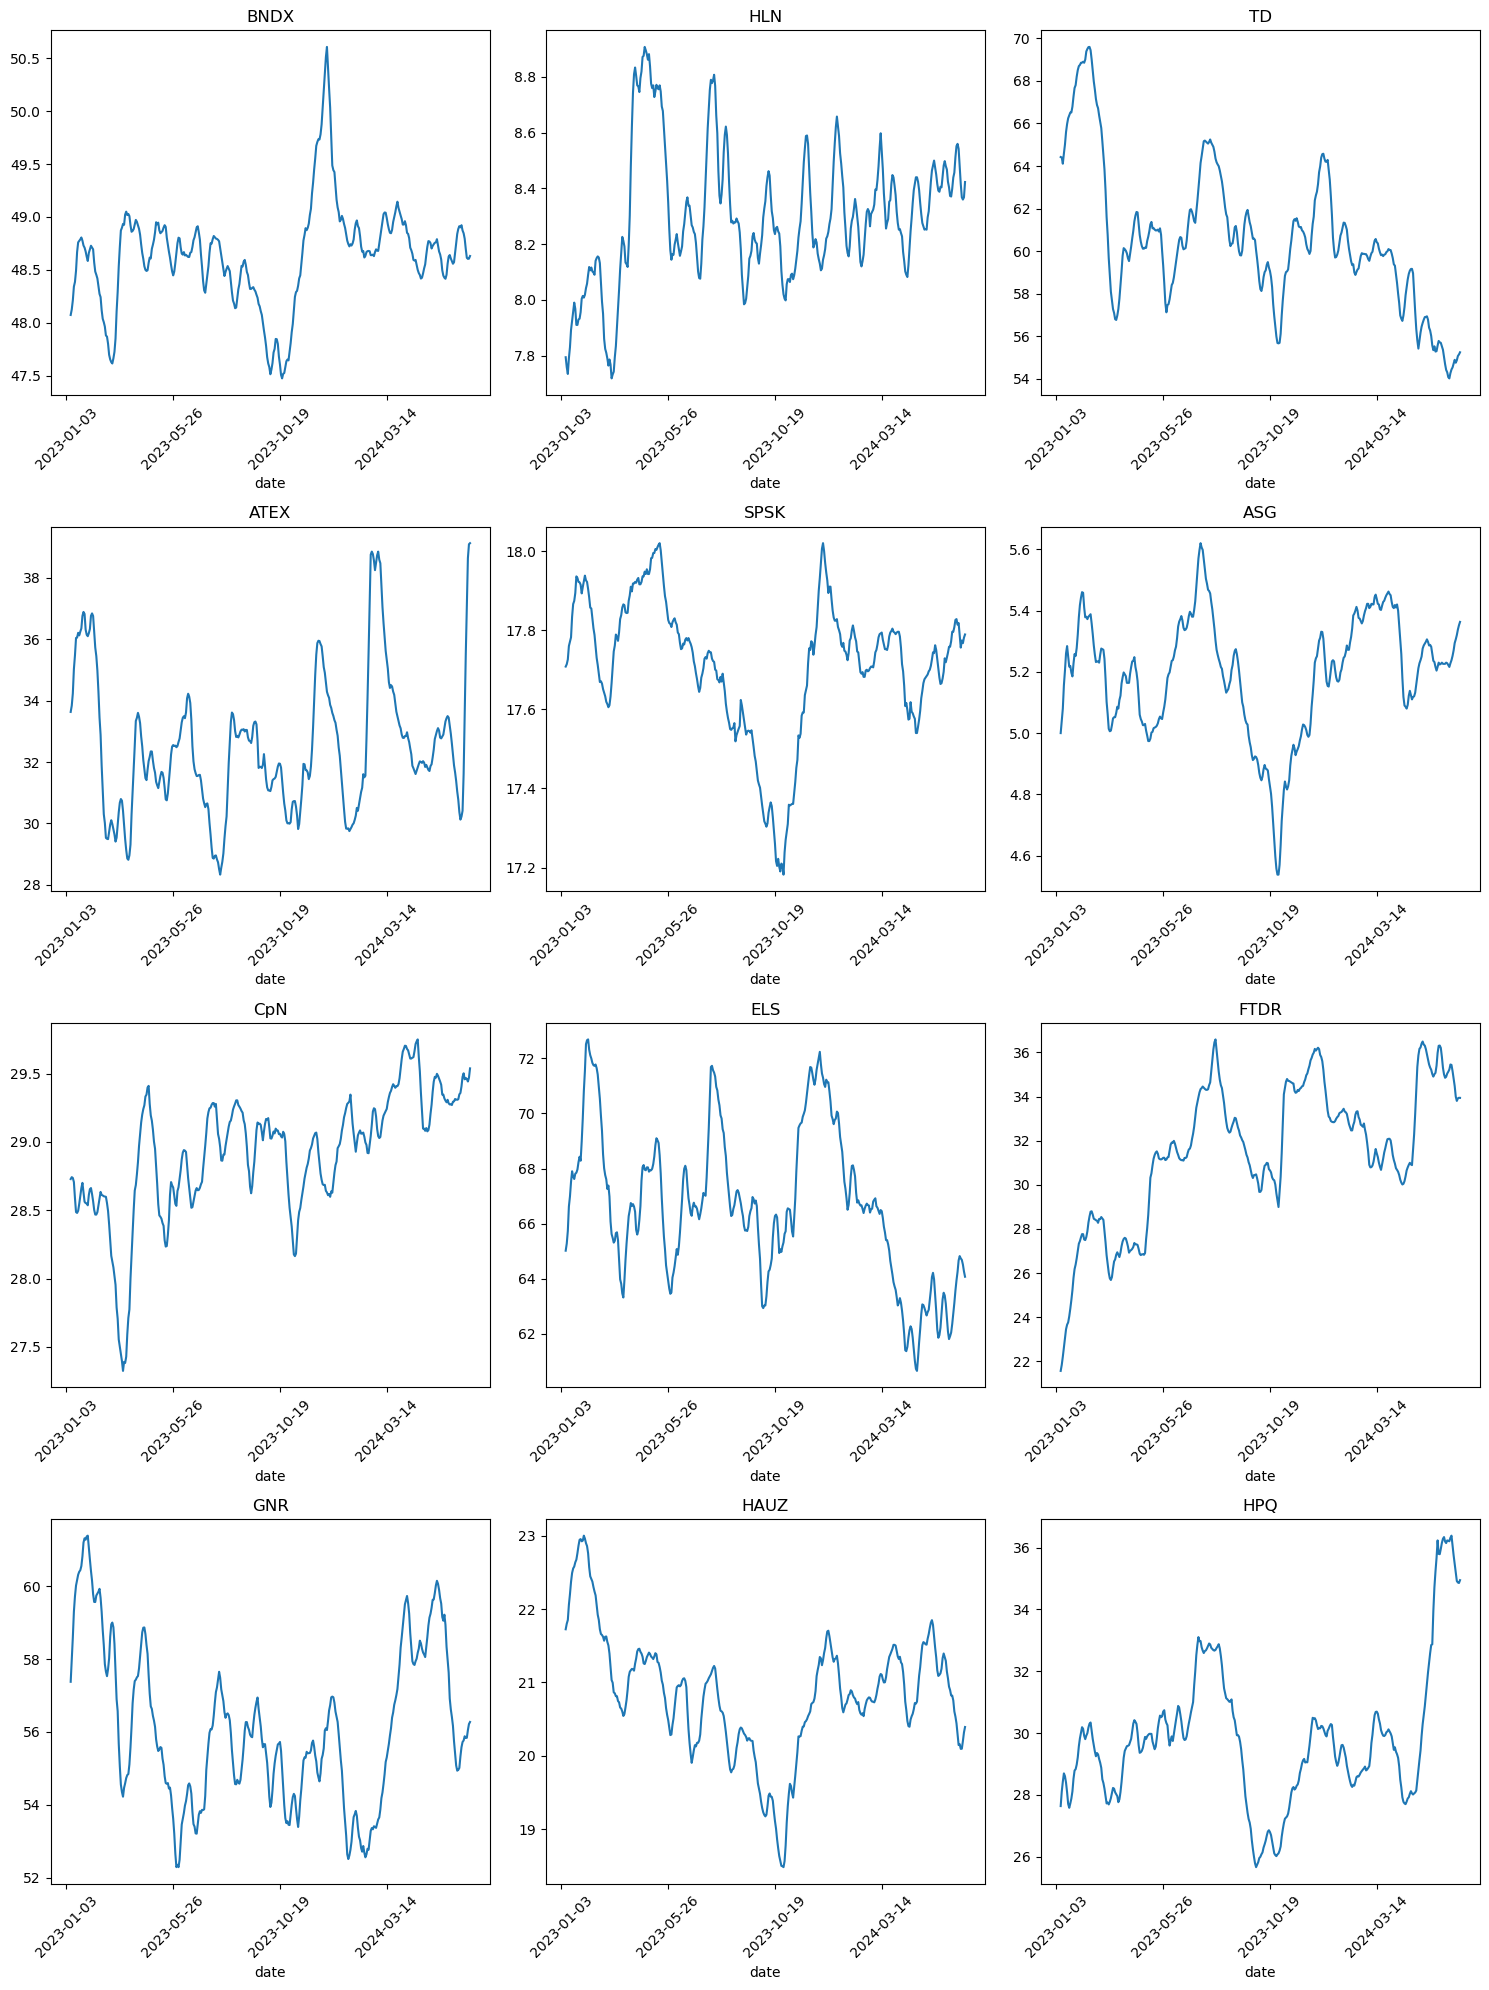

In [105]:
a = nosplits[~nosplits.ticker.isin(blacklist)].groupby('ticker')['crosses15'].mean().nlargest(12)
plot_list(df, a.keys())

In [ ]:
# RZC, HLN, KNG, DGICA, BNDX, CHSCL, CHSCM, HON, GNR, AB, SLCA